## The dataset
The dataset we are going to work with in this assignment is LFW Face. It is a public benchmark dataset for face verification. More information can be found on here http://vis-www.cs.umass.edu/lfw/index.html


In [ ]:
! wget http://vis-www.cs.umass.edu/lfw/lfw.tgz # download the file
! tar zxf lfw.tgz # unpack the content

--2023-01-15 09:51:07--  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180566744 (172M) [application/x-gzip]
Saving to: ‘lfw.tgz’

lfw.tgz             100%[===================>] 172.20M  13.2MB/s    in 15s     

2023-01-15 09:51:23 (11.6 MB/s) - ‘lfw.tgz’ saved [180566744/180566744]



In [ ]:
import glob
data_dir = 'lfw'
list_imgs = glob.glob(data_dir + "/**/*.jpg")
print(f"Number of .jpg files in '{data_dir}' folder are {len(list_imgs)}.")

Number of .jpg files in 'lfw' folder are 13234.


# The dataloader



In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

myTransform = transforms.Compose([
        transforms.Resize((160, 160)),
        transforms.ToTensor(),
    ])

image_datasets = datasets.ImageFolder(data_dir, transform=myTransform)
batchSize = 64
myDataloader = DataLoader(image_datasets, batch_size=batchSize, shuffle=False) 

torch.Size([64, 3, 160, 160])
torch.Size([3, 160, 160])
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.7843, 0.7843, 0.7804],
         [0.0039, 0.0039, 0.0039,  ..., 0.7843, 0.7843, 0.7804],
         [0.0078, 0.0039, 0.0039,  ..., 0.7882, 0.7922, 0.7882]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.6588, 0.6588, 0.6549],
         [0.0039, 0.0039, 0.0039,  ..., 0.6588, 0.6588, 0.6549],
         [0.0078, 0.0039, 0.0039,  ..., 0.6627, 0.6667, 0.6627]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
  

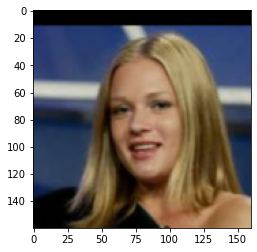

tensor(0)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


for currentBatchImgs, currentBatchLabels in myDataloader:
    print(currentBatchImgs.shape)

    print(currentBatchImgs[0].shape)
    print(currentBatchImgs[0])
  
    plt.imshow((currentBatchImgs[0].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
    plt.grid(False)
    plt.show()
  
    print(currentBatchLabels[0])
    break



# The model



In [ ]:
! pip install facenet_pytorch 
from facenet_pytorch import InceptionResnetV1

model = InceptionResnetV1(pretrained='vggface2').eval()

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device) 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.5 MB/s eta 0:00:00


  0%|          | 0.00/107M [00:00<?, ?B/s]

In [ ]:
LAYER_NAME = "last_linear"

In [ ]:
! pip install torchinfo

from torchinfo import summary
summary(model, input_size=(batchSize, 3, 160, 160), device=str(device))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                        Output Shape              Param #
InceptionResnetV1                             [64, 512]                 4,427,703
├─BasicConv2d: 1-1                            [64, 32, 79, 79]          --
│    └─Conv2d: 2-1                            [64, 32, 79, 79]          864
│    └─BatchNorm2d: 2-2                       [64, 32, 79, 79]          64
│    └─ReLU: 2-3                              [64, 32, 79, 79]          --
├─BasicConv2d: 1-2                            [64, 32, 77, 77]          --
│    └─Conv2d: 2-4                            [64, 32, 77, 77]          9,216
│    └─BatchNorm2d: 2-5                       [64, 32, 77, 77]          64
│    └─ReLU: 2-6                              [64, 32, 77, 77]          --
├─BasicConv2d: 1-3                            [64, 64, 77, 77]          --
│    └─Conv2d: 2-7                            [64, 64, 77, 77]          18,432
│    └─BatchNorm2d: 2-8                       [64, 64, 77, 77]          128
│   

In [ ]:
layer = model._modules.get(LAYER_NAME)

def get_embeddings(module, input, output):
    output = output.detach().cpu().numpy().tolist() 
    outputs.append(output) 

outputs = []


_ = layer.register_forward_hook(get_embeddings)

In [ ]:
with torch.no_grad():


  for batch, labels in myDataloader:
    batch = batch.to(device) 
    _ = model(batch)


In [ ]:

list_embeddings = [item for sublist in outputs for item in sublist]

print(f"There are {len(list_embeddings)} of embeddings for each image of total of {len(image_datasets.imgs)} images")

There are 13234 of embeddings for each image of total of 13234 images


# PCA


In [ ]:
from sklearn.decomposition import PCA
myPCA = PCA(n_components = int(45))
components_images = myPCA.fit_transform(list_embeddings)

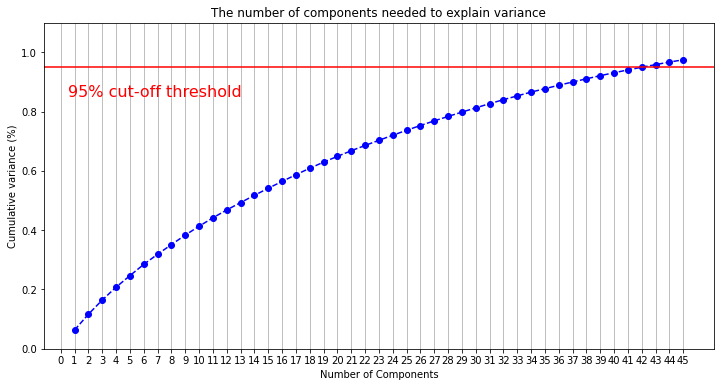

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, len(myPCA.explained_variance_ratio_)+1, step=1)
y = np.cumsum(myPCA.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(myPCA.explained_variance_ratio_)+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
from scipy.spatial import distance_matrix

distanceMatrix = distance_matrix(components_images, components_images)

In [ ]:
import matplotlib.image as pimage
import math
import matplotlib.pyplot as plt


def plot_figures(closestImgPaths, nrows = 3, ncols=3):
    
    closestImgPaths=closestImgPaths
    
    selected = [pimage.imread(path) for path in closestImgPaths]
    figures = {str(i): img  for i, img in enumerate(selected)}
    
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    fig.set_figheight(15)
    fig.set_figwidth(20)
    for ind,title in zip(range(len(figures)), figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.jet())
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional




# Distance matrix 


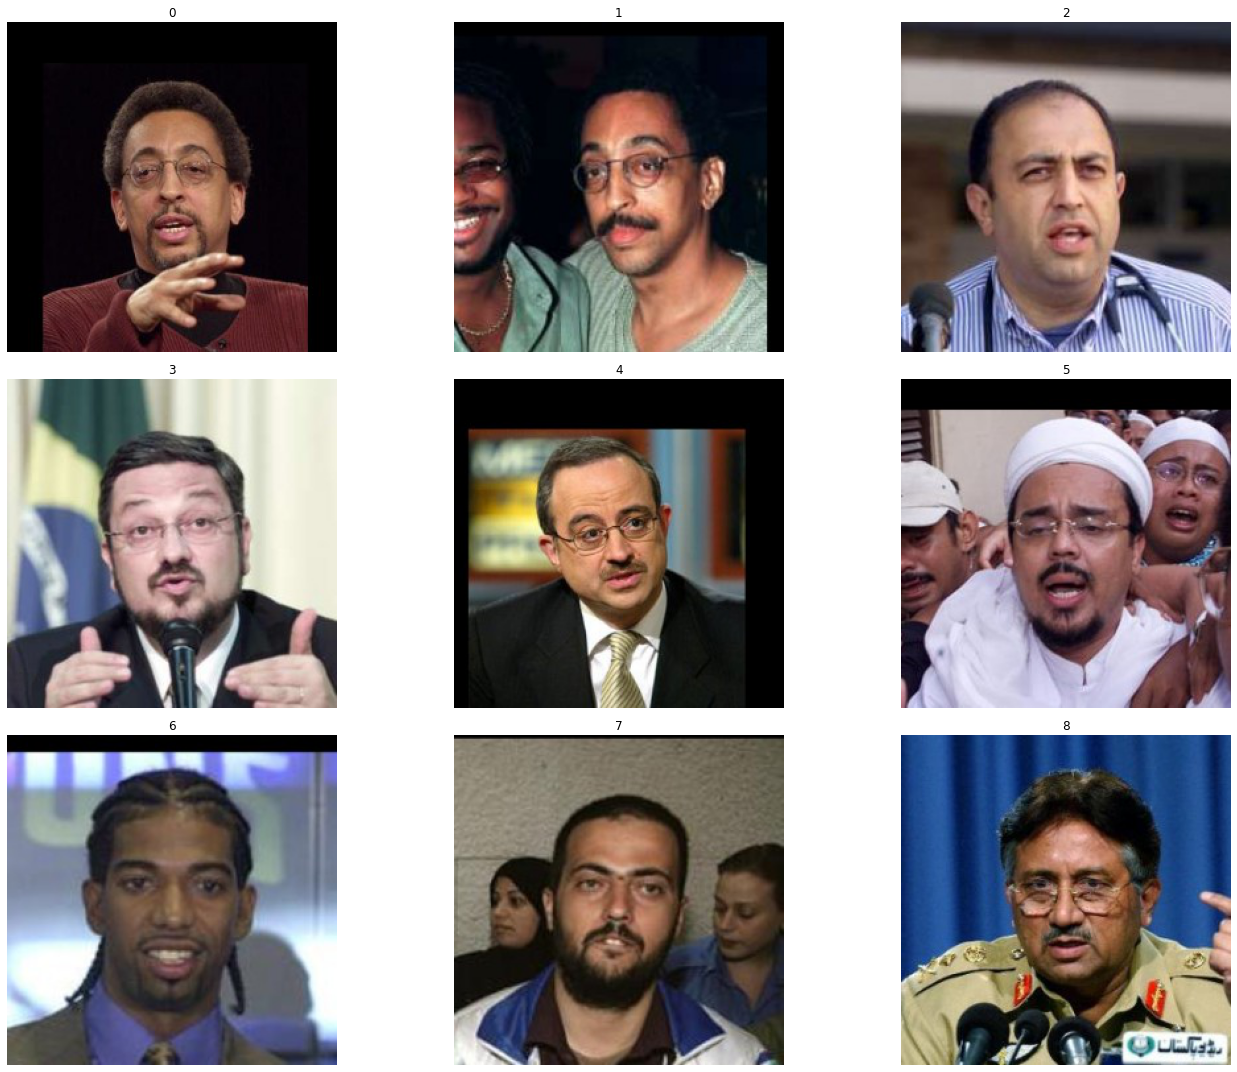

In [ ]:
import random as rnd
nClosest = 9
randomIdx = rnd.randint(0, len(image_datasets.imgs)-1)


closestImagesIdx = distanceMatrix[randomIdx].argsort()[:nClosest]


closestImgPaths = [image_datasets.imgs[idx][0] for idx in closestImagesIdx]
plot_figures(closestImgPaths)

## NearestNeighbors model and find the most similar k images

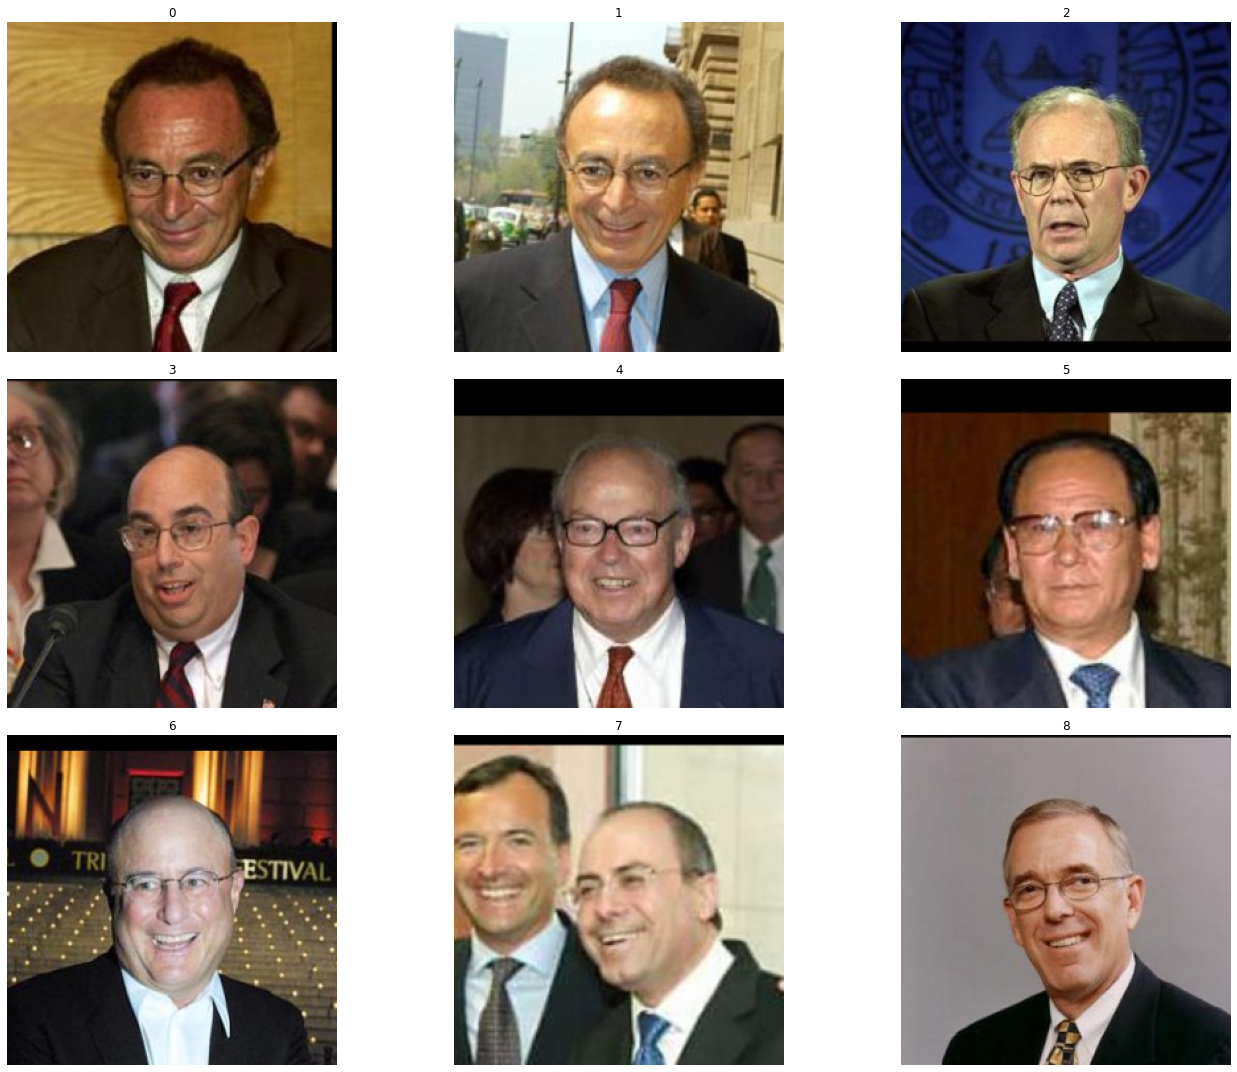

In [ ]:
from sklearn.neighbors import NearestNeighbors

k=9
random_image_idx = rnd.randint(0, len(image_datasets.imgs)-1)

x=components_images

Nearest_Neighbors_Model=NearestNeighbors(n_neighbors=k, algorithm='ball_tree')

model=Nearest_Neighbors_Model.fit(x)

idx = model.kneighbors(components_images[random_image_idx].reshape(1,-1), return_distance=False)

closestImgPaths = [image_datasets.imgs[idx][0] for idx in idx[:9][0]]  

plot_figures(closestImgPaths)
